# Sleep and COVID
*Sleep is fundamental to immune system function, we would perhaps expect that sleep quality declines before onset of symptoms. Alternatively we might expect it to decline after the onset of symptoms if sleep quality is affected by COVID.*

In [2]:
import os 
import pandas as pd 
import matplotlib.pyplot as plot
from IPython.display import display
from datetime import datetime
import math

In [3]:
!git clone https://github.com/Welltory/hrv-covid19.git

fatal: destination path 'hrv-covid19' already exists and is not an empty directory.


In [17]:
!ls hrv-covid19/data

blood_pressure.csv     participants.csv       surveys.csv
heart_rate.csv         scales_description.csv wearables.csv
hrv_measurements.csv   sleep.csv              weather.csv


In [4]:
hrv_data_dir = "hrv-covid19/data" 

dataset = []
files = os.listdir(path=hrv_data_dir)
for file in files: 
    dataset.append({ "name": file.split('.')[0],  "file": file, "path": hrv_data_dir + '/' + file })

In [6]:
dfs = {}
for d in dataset: 
    print(f"Loading {d['name']} ({d['file']}) into [{d['name']}] dataframe ") 
    dfs[d['name']] = pd.read_csv(d['path'])

Loading scales_description (scales_description.csv) into [scales_description] dataframe 
Loading participants (participants.csv) into [participants] dataframe 
Loading wearables (wearables.csv) into [wearables] dataframe 
Loading blood_pressure (blood_pressure.csv) into [blood_pressure] dataframe 
Loading surveys (surveys.csv) into [surveys] dataframe 
Loading heart_rate (heart_rate.csv) into [heart_rate] dataframe 
Loading weather (weather.csv) into [weather] dataframe 
Loading hrv_measurements (hrv_measurements.csv) into [hrv_measurements] dataframe 
Loading sleep (sleep.csv) into [sleep] dataframe 


## Investigate Sleep dataset 

In [7]:
dfsleep = dfs['sleep']
display(dfsleep)

,user_code,day,sleep_begin,sleep_end,sleep_duration,sleep_awake_duration,sleep_rem_duration,sleep_light_duration,sleep_deep_duration,pulse_min,pulse_max,pulse_average
0,0d297d2410,2019-12-31,2019-12-31 07:50:32,2019-12-31 08:45:22,3290.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0d297d2410,2020-01-01,2020-01-01 04:13:41,2020-01-01 09:45:02,19881.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0d297d2410,2020-01-02,2020-01-02 02:14:52,2020-01-02 08:06:00,21068.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0d297d2410,2020-01-03,2020-01-03 00:10:00,2020-01-03 08:45:10,30910.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0d297d2410,2020-01-04,2020-01-04 01:27:25,2020-01-04 08:52:20,26695.0,NaN,NaN,21480.0,NaN,55.0,95.0,72.5
...,...,...,...,...,...,...,...,...,...,...,...,...
420,fcf3ea75b0,2020-04-22,2020-04-22 00:23:22,2020-04-22 07:17:23,24841.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421,fcf3ea75b0,2020-04-23,2020-04-22 22:40:51,2020-04-23 07:04:35,30224.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
422,fcf3ea75b0,2020-05-06,2020-05-05 21:48:53,2020-05-06 08:02:09,36796.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
423,fcf3ea75b0,2020-05-06,2020-05-06 00:18:53,2020-05-06 10:32:09,36796.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
print(len(dfsleep))

425


425 observations is a good amount, but not all wearables record the same data

In [25]:
for attrb in dfsleep.columns:
    filtered_dfsleep = dfsleep[dfsleep[attrb].notna()]
    print(len(filtered_dfsleep), "values for", attrb)

425 values for user_code
425 values for day
425 values for sleep_begin
425 values for sleep_end
425 values for sleep_duration
9 values for sleep_awake_duration
7 values for sleep_rem_duration
27 values for sleep_light_duration
14 values for sleep_deep_duration
15 values for pulse_min
15 values for pulse_max
15 values for pulse_average


I dont think there is enough data to look at any relationships other than sleep duration, a shame because that would be very interesting.

In [29]:
#find number of individuals
unique_duplicates_count = dfsleep['user_code'].duplicated(keep=False)
unique_duplicate_values = dfsleep['user_code'][unique_duplicates_count].unique()
print(len(unique_duplicate_values))


9


9 individuals is quite a small sample size but we'll have a look anyway

In [39]:
# create a df that holds the id number and the sleep duration for each night
dfsleep_test = dfsleep[dfsleep['sleep_duration'].notna()]

dfsleep_pivot = dfsleep_test.pivot_table(index='user_code', columns='day', values='sleep_duration')

display(dfsleep_pivot)


day,2019-12-31,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,...,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-13,2020-06-14,2020-06-16,2020-06-17
user_code,,,,,,,,,,,,,,,,,,,,,
0d297d2410,3290.0,19881.0,21068.0,30910.0,26695.0,31458.0,18480.0,27212.0,26407.0,29214.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276ab22485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35c7355282,NaN,19281.0,29108.0,25452.0,14983.0,29408.0,20719.0,21696.0,30990.0,27260.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4985083f4d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6be5033971,3600.0,15000.0,33600.0,30300.0,34800.0,37200.0,24600.0,19200.0,29700.0,27000.0,...,29700.0,30600.0,21900.0,30600.0,20400.0,NaN,22800.0,22800.0,30000.0,NaN
9871ee5e7b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a1c2e6b2eb,18720.0,NaN,24840.0,28260.0,22500.0,22664.0,21660.0,21600.0,24300.0,14700.0,...,28380.0,NaN,27540.0,32040.0,28140.0,20880.0,NaN,12782.0,19800.0,25320.0
c174f32d88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
e8240b51a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Start by looking at simple average sleep before and after Covid (very rudimentary)

In [22]:
dfsymp = dfs['participants']
#drop vlues without symptom onset
dfsymp = dfsymp[dfsymp['symptoms_onset'].notna()]
display(dfsymp)

,user_code,gender,age_range,city,country,height,weight,symptoms_onset
1,013f6d3e5b,f,18-24,São Paulo,Brazil,174.00,77.300,5/15/2020
2,01bad5a519,m,45-54,St Petersburg,Russia,178.00,92.000,4/5/2020
3,0210b20eea,f,25-34,Sochi,Russia,169.00,60.000,5/6/2020
4,024719e7da,f,45-54,St Petersburg,Russia,158.00,68.500,5/27/2020
5,02a2b827c9,m,25-34,NaN,Russia,177.00,87.100,3/27/2020
...,...,...,...,...,...,...,...,...
178,f9edcb7056,f,65-74,Folsom,United States,154.94,130.300,3/16/2020
179,fcf3ea75b0,f,45-54,Moscow,Russia,168.00,92.644,5/1/2020
180,fd387f6269,f,35-44,Attleboro,United States,165.00,115.439,5/1/2020
182,fde84801d8,f,45-54,Tambov,Russia,168.00,79.500,4/16/2020


In [67]:
for user, row in dfsleep_pivot.iterrows():

    dfsymp['user_code'] = dfsymp['user_code'].astype(str)
    user = str(user)

    date_of_symptoms = dfsymp.loc[dfsymp['user_code'] == user, 'symptoms_onset']
    if(len(date_of_symptoms) == 0):
        print("No symptom data for", user)
        continue
    datesymp = pd.to_datetime(date_of_symptoms.iloc[0])
    sleep_dur_pre = []
    sleep_dur_post = []
    for date, sleep_duration in row.items():
        date_compa = pd.to_datetime(date)
        if math.isnan(sleep_duration):
            continue
        
        if (date_compa < datesymp):
            sleep_dur_pre.append(int(sleep_duration))
        else:
            sleep_dur_post.append(int(sleep_duration))
    if len(sleep_dur_pre) ==0:
        avg_pre = "*No Data*"
    else:
        avg_pre = sum(sleep_dur_pre)/len(sleep_dur_pre)
        avg_pre = avg_pre/3600
    if len(sleep_dur_post) ==0:
        avg_post = "*No Data*"
    else:
        avg_post = sum(sleep_dur_post)/len(sleep_dur_post)
        avg_post = avg_post/3600

    print("user:", user, "averaged", avg_pre, "hour before and", avg_post, "hours after")

No symptom data for 0d297d2410
No symptom data for 276ab22485
user: 35c7355282 averaged 7.153638888888889 hour before and 6.785932914046122 hours after
No symptom data for 4985083f4d
user: 6be5033971 averaged 8.06808943089431 hour before and 7.87280701754386 hours after
user: 9871ee5e7b averaged *No Data* hour before and 7.05 hours after
No symptom data for a1c2e6b2eb
user: c174f32d88 averaged 8.183333333333334 hour before and 11.117948717948718 hours after
user: e8240b51a2 averaged 7.8966666666666665 hour before and 8.955555555555556 hours after
user: fcf3ea75b0 averaged 7.647916666666666 hour before and 8.714166666666667 hours after


/var/folders/kc/bhtc6wh93y13rlnpcwh20dkm0000gn/T/ipykernel_81332/3084397196.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsymp['user_code'] = dfsymp['user_code'].astype(str)
/var/folders/kc/bhtc6wh93y13rlnpcwh20dkm0000gn/T/ipykernel_81332/3084397196.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsymp['user_code'] = dfsymp['user_code'].astype(str)
/var/folders/kc/bhtc6wh93y13rlnpcwh20dkm0000gn/T/ipykernel_81332/3084397196.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

A quick look at the data above is pretty inconclusive, for some it looks like total sleep increases as they try to sleep it off, for others it seems to decrease. Perhaps we need to limit our analysis to a few days before and a few days after.

In [70]:
for user, row in dfsleep_pivot.iterrows():

    dfsymp['user_code'] = dfsymp['user_code'].astype(str)
    user = str(user)

    date_of_symptoms = dfsymp.loc[dfsymp['user_code'] == user, 'symptoms_onset']
    if(len(date_of_symptoms) == 0):
        print("No symptom data for", user)
        continue
    datesymp = pd.to_datetime(date_of_symptoms.iloc[0])
    sleep_dur_pre = []
    sleep_dur_post = []
    for date, sleep_duration in row.items():
        date_compa = pd.to_datetime(date)
        if math.isnan(sleep_duration):
            continue
        if((abs(date_compa - datesymp)).days > 7):
            continue
        if (date_compa < datesymp):
            sleep_dur_pre.append(int(sleep_duration))
        else:
            sleep_dur_post.append(int(sleep_duration))
    if len(sleep_dur_pre) ==0:
        avg_pre = "*No Data*"
    else:
        avg_pre = sum(sleep_dur_pre)/len(sleep_dur_pre)
        avg_pre = avg_pre/3600
    if len(sleep_dur_post) ==0:
        avg_post = "*No Data*"
    else:
        avg_post = sum(sleep_dur_post)/len(sleep_dur_post)
        avg_post = avg_post/3600

    print("user:", user, "averaged", avg_pre, "hour before and", avg_post, "hours after")

No symptom data for 0d297d2410
No symptom data for 276ab22485
user: 35c7355282 averaged 6.261277777777777 hour before and 7.145714285714285 hours after
No symptom data for 4985083f4d
user: 6be5033971 averaged 9.61111111111111 hour before and *No Data* hours after
user: 9871ee5e7b averaged *No Data* hour before and *No Data* hours after
No symptom data for a1c2e6b2eb
user: c174f32d88 averaged *No Data* hour before and *No Data* hours after
user: e8240b51a2 averaged 7.8966666666666665 hour before and 8.955555555555556 hours after
user: fcf3ea75b0 averaged *No Data* hour before and 8.714166666666667 hours after


/var/folders/kc/bhtc6wh93y13rlnpcwh20dkm0000gn/T/ipykernel_81332/778043062.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsymp['user_code'] = dfsymp['user_code'].astype(str)
/var/folders/kc/bhtc6wh93y13rlnpcwh20dkm0000gn/T/ipykernel_81332/778043062.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsymp['user_code'] = dfsymp['user_code'].astype(str)
/var/folders/kc/bhtc6wh93y13rlnpcwh20dkm0000gn/T/ipykernel_81332/778043062.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

The data availability has deteriorated to the point of simply being two case studies. But both now seem to exhibit an increased sleep duration as symptoms onset. This could be driven by the sleep before reducing immune function, or it could be due to an increased sleep need to recover from covid. It could very easily be random given the sample size.

The sleep dataset proved to be quite poor. Lets look at something with more data.

## Heart Rate

In [10]:
dfheartrate = dfs['heart_rate']
dfhrv = dfs['hrv_measurements']

display(dfheartrate)
display(dfhrv)

,user_code,datetime,heart_rate,is_resting
0,007b8190cf,2020-04-26 04:49:25,70,0
1,01bad5a519,2020-04-23 06:21:03,74,0
2,01bad5a519,2020-04-23 09:46:01,82,0
3,01bad5a519,2020-04-23 14:05:06,90,0
4,01bad5a519,2020-04-24 03:41:18,72,0
...,...,...,...,...
523778,fe5ca7e4ea,2020-05-23 06:31:33,85,0
523779,fe6c1b1349,2020-05-07 12:05:04,68,0
523780,fe6c1b1349,2020-05-10 06:32:00,70,0
523781,fe6c1b1349,2020-05-12 06:31:42,77,0


,user_code,rr_code,measurement_datetime,time_of_day,bpm,meanrr,mxdmn,sdnn,rmssd,pnn50,...,lf,hf,vlf,lfhf,total_power,how_feel,how_mood,how_sleep,tags,rr_data
0,007b8190cf,10489a6aea,2020-04-21 21:23:08,morning,75,795.90,0.12,45.802,54.174,15.15,...,508.0,1076.0,267.0,0.472,1851.0,0,-1,NaN,COVID-19; Workout; Sex; Hobby; Studying; Sleep...,"819,1008,831,847,785,778,866,839,801,793,846,8..."
1,007b8190cf,9610d4d4dc,2020-04-26 11:19:25,morning,70,858.00,0.11,32.889,33.022,16.16,...,409.0,310.0,176.0,1.319,895.0,0,0,0.0,NaN,"888,775,811,883,890,894,894,899,893,889,890,83..."
2,013f6d3e5b,f3de056155,2020-05-15 04:14:21,night,83,724.10,0.17,54.811,65.987,17.17,...,432.0,881.0,194.0,0.490,1507.0,-1,-2,NaN,COVID-19; Fast/Diet; Hungry; Tired; Fever; I c...,"694,832,642,801,751,716,737,742,773,760,701,73..."
3,013f6d3e5b,b04489e32f,2020-05-19 03:06:02,night,75,802.64,0.20,72.223,70.039,22.22,...,814.0,1487.0,1719.0,0.547,4020.0,0,0,NaN,NaN,"821,817,771,805,833,788,747,724,792,825,775,75..."
4,01bad5a519,ac52c706c6,2019-12-31 09:07:43,morning,78,768.07,0.10,29.650,21.196,4.04,...,489.0,128.0,96.0,3.820,713.0,0,0,0.0,NaN,"741,740,734,737,740,731,751,747,745,728,747,76..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3240,fe6c1b1349,e5a41d0b95,2020-04-14 17:47:06,day,79,762.99,0.20,54.402,37.644,16.16,...,1075.0,435.0,1304.0,2.471,2814.0,-1,-1,NaN,Worry; Coffee; Tired; Meal; Headache,"740,691,724,713,722,720,742,761,734,763,751,73..."
3241,fe6c1b1349,48792bfdd4,2020-04-15 09:32:00,morning,91,655.95,0.16,48.130,31.550,9.09,...,1630.0,226.0,781.0,7.212,2637.0,0,0,-1.0,Work; Pain; Morning,"696,643,605,619,638,658,658,661,645,606,636,63..."
3242,fe6c1b1349,354ea335a4,2020-04-16 09:31:40,morning,80,752.38,0.22,63.191,54.655,20.20,...,2611.0,524.0,426.0,4.983,3561.0,1,0,1.0,Work; Morning,"772,793,761,785,774,742,754,791,835,755,759,78..."
3243,fe6c1b1349,30b1dcaaf9,2020-05-12 09:31:42,morning,77,782.22,0.19,73.590,52.788,12.12,...,381.0,204.0,1258.0,1.868,1843.0,-1,0,0.0,COVID-19; Drugs,"1224,1052,763,795,790,792,800,794,788,830,777,..."


Lets start by having a look at the simple metric of resting heart rate, and lets do it around their COVID symptom onset

In [20]:
restHRdf = dfheartrate[dfheartrate['is_resting'] == 1]

restHRdf['datetime'] = pd.to_datetime(restHRdf['datetime'])
restHRdf['datetime'] = restHRdf['datetime'].dt.date

restHRdf_piv = restHRdf.pivot_table(index = 'user_code', columns = 'datetime', values = 'heart_rate')

display(restHRdf_piv)

/var/folders/kc/bhtc6wh93y13rlnpcwh20dkm0000gn/T/ipykernel_650/431894419.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restHRdf['datetime'] = pd.to_datetime(restHRdf['datetime'])
/var/folders/kc/bhtc6wh93y13rlnpcwh20dkm0000gn/T/ipykernel_650/431894419.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restHRdf['datetime'] = restHRdf['datetime'].dt.date


,user_code,datetime,heart_rate,is_resting
146,0d297d2410,2020-01-01,72,1
185,0d297d2410,2020-01-02,59,1
377,0d297d2410,2020-01-03,71,1
550,0d297d2410,2020-01-04,56,1
2328,0d297d2410,2020-01-05,78,1
...,...,...,...,...
523743,fde84801d8,2020-06-16,71,1
523750,fde84801d8,2020-06-16,69,1
523754,fde84801d8,2020-06-16,71,1
523760,fde84801d8,2020-06-16,69,1


datetime,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,...,2020-06-10,2020-06-11,2020-06-12,2020-06-13,2020-06-14,2020-06-15,2020-06-16,2020-06-17,2020-06-18,2020-06-19
user_code,,,,,,,,,,,,,,,,,,,,,
0d297d2410,72.000000,59.000000,71.0,56.0,78.000000,62.000000,55.0,63.0,54.0,54.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42a99d8248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4985083f4d,64.000000,60.000000,58.0,54.0,68.000000,58.000000,64.0,56.0,67.0,62.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4c2702c3e1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5d200bd1c6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6be5033971,53.000000,48.000000,48.0,51.0,48.000000,51.000000,53.0,50.0,50.0,49.0,...,48.000000,54.00,46.0,48.000000,49.0,46.000,46.00000,46.00,NaN,NaN
7ba5381254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a1c2e6b2eb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,64.333333,67.75,63.0,68.166667,68.6,61.000,58.73913,66.25,66.0,NaN
aa036185e3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,46.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


No symptom data for 0d297d2410
No symptom data for 4985083f4d
No symptom data for a1c2e6b2eb
No symptom data for ad41d5b79c
No symptom data for cdfbcad405
No symptom data for f922e9b06c


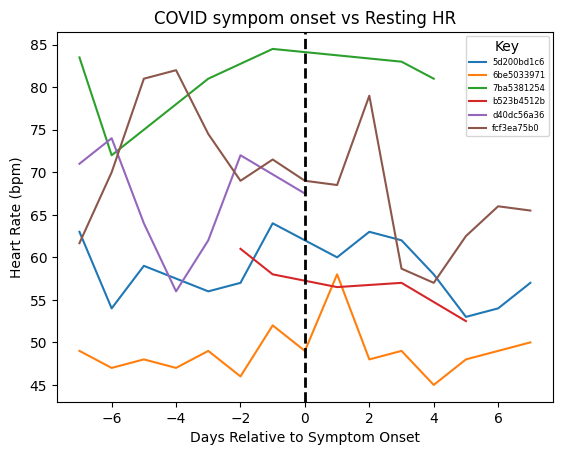

In [52]:
for user, row in restHRdf_piv.iterrows():
    dfsymp['user_code']
    date_of_symptoms = dfsymp.loc[dfsymp['user_code'] == user, 'symptoms_onset']

    if(len(date_of_symptoms) == 0):
        print("No symptom data for", user)
        continue
    datesymp = pd.to_datetime(date_of_symptoms.iloc[0])
    hrs = []
    dates = []
    for date, hr in row.items():
        date = pd.to_datetime(date)        
        if math.isnan(hr):
            continue
        if((abs(date - datesymp)).days > 7):
            continue
        day_ref = (datesymp - date).days
        hrs.append(hr)
        dates.append(day_ref)

    if(len(dates)>0):
        plot.plot(dates, hrs, label = user)
        

plot.title("COVID sympom onset vs Resting HR")
plot.xlabel("Days Relative to Symptom Onset")
plot.ylabel("Heart Rate (bpm)")
plot.axvline(x=0, color='black', linestyle='--', linewidth=2)
plot.legend(title= "Key", fontsize = 6)

Again N is small when we clean the data, but this time there is also clearly no discernable pattern. Lets have a look at some other data.